In [1]:
#é um teste que fornce uma estrutura rigorosa para tomar decisões baseadas em evidencias estatisticas.
#Permite formular hipotese nula(H0), que é uma suposição inicial a ser testada e uma hipotese alternativa(H1)
#que é uma afirmação que contradiz a hipotese nula

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Visualizando dados
dados = {
    'grupo_a': np.random.uniform(8,15,size=365),
    'grupo_b': np.random.uniform(8,10,size=365)
}
df = pd.DataFrame(dados)
df

,grupo_a,grupo_b
0,10.858646,9.515211
1,12.374700,8.947056
2,13.242717,8.112273
3,10.490872,8.625388
4,8.969550,8.461632
...,...,...
360,14.433616,9.926644
361,13.741201,8.048937
362,9.618114,9.777697
363,8.928010,8.686361


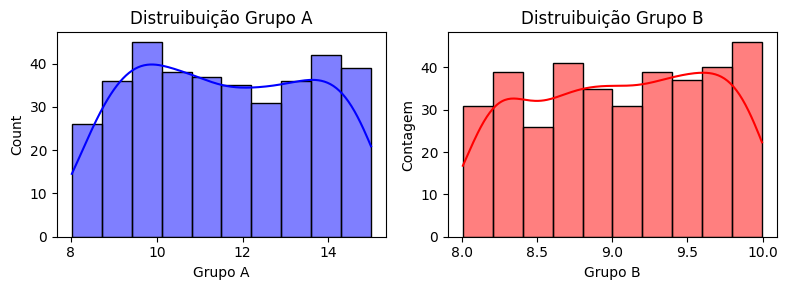

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,3))

#Plotando histograma do grupo a
sns.histplot(df['grupo_a'], ax=ax1, kde=True, color='blue')
ax1.set_title('Distruibuição Grupo A')
ax1.set_xlabel('Grupo A')

sns.histplot(df['grupo_b'], ax=ax2, kde=True, color='red')
ax2.set_title('Distruibuição Grupo B')
ax2.set_xlabel('Grupo B')
ax2.set_ylabel('Contagem')

#ajUSTANDO LAYOUT
plt.tight_layout()

plt.show()

In [13]:
#TESTE DE STUDENT
t_statistic, p_value = stats.ttest_ind(df['grupo_a'], df['grupo_b'])
print('Estatistica t: ', t_statistic)
print('Estatistica p: ', p_value)

Estatistica t:  23.23034573951175
Estatistica p:  9.540128127814113e-90


In [14]:
#Exemplos mais praticos usando media de cliques em propagandas
# Dados de cliques antes e depois da mudança
antes = [100, 110, 105, 120, 115]
depois = [130, 125, 140, 135, 130]

# Teste t de Student para amostras pareadas
t_statistic, p_value = stats.ttest_rel(antes, depois)

print(f"Estatística t: {t_statistic}")
print(f"p-valor: {p_value}")

# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: a mudança teve um impacto significativo nos cliques.")
else:
    print("Não rejeitamos a hipótese nula: a mudança não teve um impacto significativo nos cliques.")

Estatística t: -5.047146145152358
p-valor: 0.007245591499253211
Rejeitamos a hipótese nula: a mudança teve um impacto significativo nos cliques.


In [16]:
#Usando teste de hipotese 2
#Vamos avaliar notas de alunos, grupo A teve treinamento e o grupo B nao teve
np.random.seed(42) #Definindo uma semente aleatoria para reprodutibilidade
grupo_a=np.random.normal(loc=30, scale=5,size=100)

grupo_b=np.random.normal(loc=30, scale=5,size=100)

print(f'''
    Grupo_A:{grupo_a}\n\n
    Grupo_B:{grupo_b}
    ''')


    Grupo_A:[32.48357077 29.30867849 33.23844269 37.61514928 28.82923313 28.82931522
 37.89606408 33.83717365 27.65262807 32.71280022 27.68291154 27.67135123
 31.20981136 20.43359878 21.37541084 27.18856235 24.9358444  31.57123666
 25.45987962 22.93848149 37.32824384 28.8711185  30.33764102 22.87625907
 27.27808638 30.55461295 24.24503211 31.87849009 26.99680655 28.54153125
 26.99146694 39.26139092 29.93251388 24.71144536 34.11272456 23.89578175
 31.04431798 20.20164938 23.35906976 30.98430618 33.6923329  30.85684141
 29.42175859 28.49448152 22.60739005 26.40077896 27.69680615 35.28561113
 31.71809145 21.18479922 31.62041985 28.0745886  26.61539    33.05838144
 35.15499761 34.6564006  25.80391238 28.45393812 31.65631716 34.87772564
 27.60412881 29.07170512 24.46832513 24.01896688 34.06262911 36.78120014
 29.63994939 35.01766449 31.80818013 26.77440123 31.80697803 37.69018283
 29.8208698  37.82321828 16.90127448 34.10951252 30.43523534 28.50496325
 30.45880388 20.06215543 28.90164056 3

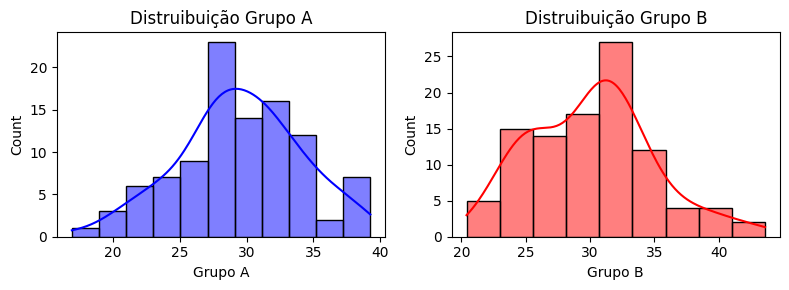

In [17]:
#Agora Visualizar dados com grafico
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,3))

#Plotando histograma do grupo a
sns.histplot(grupo_a, ax=ax1, kde=True, color='blue')
ax1.set_title('Distruibuição Grupo A')
ax1.set_xlabel('Grupo A')

sns.histplot(grupo_b, ax=ax2, kde=True, color='red')
ax2.set_title('Distruibuição Grupo B')
ax2.set_xlabel('Grupo B')

#ajUSTANDO LAYOUT
plt.tight_layout()

plt.show()

In [18]:
#Aplicando Teste T Student
t_statistic, p_value = stats.ttest_rel(grupo_a, grupo_b)

print(f"Estatística t: {t_statistic}")
print(f"p-valor: {p_value}")

# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: a mudança teve um impacto significativo nas notas.")
else:
    print("Não rejeitamos a hipótese nula: a mudança não teve um impacto significativo nas notas.")

Estatística t: -0.8986610518746224
p-valor: 0.3710137353333418
Não rejeitamos a hipótese nula: a mudança não teve um impacto significativo nas notas.


In [19]:
#CORRELAÇÃO DE PEARSON a correlação de Pearson é uma ferramenta útil para entender relações
#lineares entre variáveis, como gastos em propaganda e vendas. Use-a para tomar decisões informadas, 
#mas sempre considere o contexto e outros fatores que possam influenciar os resultados.

#Exemplo usando vendas e propaganda
# Dados
gastos_propaganda = [1000, 2000, 3000, 4000, 5000]
vendas = [50, 80, 120, 150, 200]

# Calculando a correlação de Pearson
correlacao = np.corrcoef(gastos_propaganda, vendas)[0, 1]

print(f"Coeficiente de correlação de Pearson: {correlacao:.2f}")

# Interpretação
if correlacao > 0:
    print("Há uma correlação positiva entre gastos em propaganda e vendas.")
elif correlacao < 0:
    print("Há uma correlação negativa entre gastos em propaganda e vendas.")
else:
    print("Não há correlação linear entre gastos em propaganda e vendas.")

Coeficiente de correlação de Pearson: 1.00
Há uma correlação positiva entre gastos em propaganda e vendas.


In [24]:
#Agora usando SNS e scipy
#Outro exemplo
dados = {
    'horas_estudo':[5,7,3,4,6],
    'notas':[80,85,70,75,90]
}
df = pd.DataFrame(dados)

#Agora fazer a correlação de pearson
coef_corr, p_value = stats.pearsonr(df['horas_estudo'], df['notas'])
print(f"Coeficiente de correlação de Pearson: {coef_corr:.2f}")
print(f"valor de p_value:{p_value}")
# Interpretação
if coef_corr > 0:
    print("Há uma correlação positiva entre gastos em horas de estudo com as notas.")
elif coef_corr < 0:
    print("Há uma correlação negativa entre gastos em horas de estudo com as notas.")
else:
    print("Não há correlação linear entre gastos em horas de estudo com as notas.")

Coeficiente de correlação de Pearson: 0.90
valor de p_value:0.03738607346849871
Há uma correlação positiva entre gastos em horas de estudo com as notas.


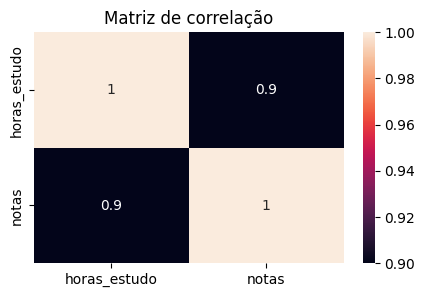

In [26]:
#Grafico de HeatMap, é uma representação dos dados em forma de calor
#Muito util para visualizar grandes conjuntos

#Criando correlação
correlacao = df.corr()

#plotando
plt.figure(figsize=(5,3))

sns.heatmap(correlacao, annot=True)

plt.title('Matriz de correlação')
plt.show()

In [28]:
#Teste qui-quadrado
#Contexto- Uma pesquisa sobre preferencia alimentar de diferentes grupos de pessoas
#O teste vai analisar se existe preferencia em relação ao sexo das pessoas

preferencias = ["Pizza", "Hamburguer", "Pizza", "Salada", "Hamburguer"]
sexo = ["Masculino", "Feminino", "Masculino", "Feminino", "Masculino"]

#Tabela de contingencia
tabela_contingencia=pd.crosstab(preferencias, sexo) #Passa as colunas

#Teste de qui-quadrado
result = stats.chi2_contingency(tabela_contingencia)

#Visualizando o resultado
print('\n Estatistica chi-quadrado:', result.statistic)
print('\n P_value: ', result.pvalue) #Nao tem associação pois 0.23 é menor


 Estatistica chi-quadrado: 2.916666666666667

 P_value:  0.23262365791729261


AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

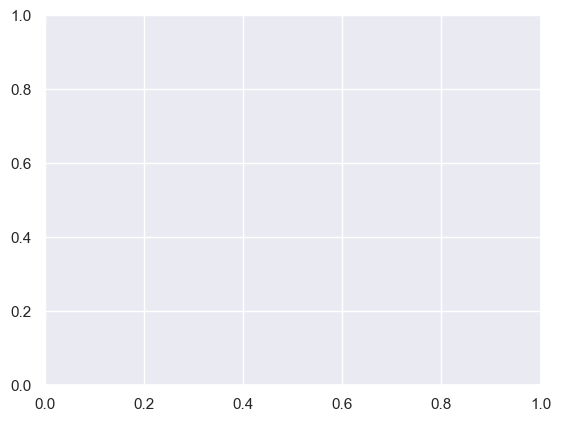

In [30]:
#Usando graficos de barras empilhadas
sns.set(style='darkgrid')
ax = tabela_contingencia.plot(kind='bar', stacked=True, colors=['pink', 'blue'])

ax.set_xlabel('Preferencia alimenticia')
ax.set_ylabel('Contagem')
ax.set_title('Preferencia de generos')
plt.show()